# CAPSTONE PROJECT: GENRE CLASSIFICATION 


### Spotify Dataset # 1 
Stephanie Barrett | September 5, 2023

This project aims to use machine learning to classify songs into the correct genre based on particular attributes. 

**Introduction**: This notebook is an analysis of the smaller spotify dataset scraped from Spotify's API and posted on Kaggle. This dataset includes attributes of 10130 songs: 565 absolute music, 740 classical music, 1052 electronic music, 1273 folk, 1141 hiphop, 1065 jazz, 1867 popular, 1087 rnb, 1340 rock. The features for listed in the data dictionary below. There wasn't any information available on the where this data came from, when it was scraped, or the dates of the songs, but the data dictionary below is from a similar spotify dataset. 

***
**TABLE OF CONTENTS**

[Preliminary EDA](#PRELIMINARY-EDA)

[Missing Values and Duplicates](#MISSING-VALUES-AND-DUPLICATES)

[Distributions and Correlations](#DISTRIBUTIONS-AND-CORRELATIONS)

[Next Steps](#NEXT-STEPS)
***
    

#### FEATURE DICTIONARY 

| FEATURE        | DESCRIPTION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track`            | The name of the track                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| `artist`           | The name of the artist                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| `url`              | The resource identifier for the track                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| `danceability`     | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                                                                                                                                                                                                                                                                       |
| `energy`           | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.                                                                                                                          |
| `key`              | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.                                                                                                                                                                                                                                                                                                                             |
| `loudness`         | loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.                                                                                                                                                                             |
| `danceability`     | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 0.0 = least danceable and 1.0 = most danceable                                                                                                                                                                                                                                                                                                  |
| `mode`             | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                                                                                                                                                                                                                                                                                                                    |
| `speechiness`      | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
| acousticness     | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                                                                                                                                                                       |
| `instrumentalness` | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.                                                                                                                 |
| `liveness`         | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.                                                                                                                                                                                                                                                                                            |
| `valence`          | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).                                                                                                                                                                                                                                                                  |
| `tempo`            | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.                                                                                                                                                                                                                                                                                                                         |
| `duration_ms`      | The duration of the track in milliseconds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| `time_signature`   | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).                                                                                                                                                                                                                                                                                                                                                      |

## Preliminary EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
spotify = pd.read_csv("~/Desktop/CapstoneProject/data/spotifydata1.csv", encoding = "ISO-8859-1")

In [3]:
# Checking the shape of the dataframe 
print(f'There are {spotify.shape[0]} rows and {spotify.shape[1]} columns.')

There are 10131 rows and 22 columns.


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10131 non-null  object 
 1   danceability      10127 non-null  float64
 2   energy            10127 non-null  float64
 3   key               10127 non-null  float64
 4   loudness          10127 non-null  float64
 5   mode              10127 non-null  float64
 6   speechiness       10127 non-null  float64
 7   acousticness      10130 non-null  float64
 8   instrumentalness  10130 non-null  float64
 9   liveness          10130 non-null  float64
 10  valence           10130 non-null  float64
 11  tempo             10130 non-null  float64
 12  type              10130 non-null  object 
 13  id                10130 non-null  object 
 14  uri               10130 non-null  object 
 15  track_href        10130 non-null  object 
 16  analysis_url      10130 non-null  object

In [7]:
spotify.head(1)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.00541,0.0269,0.0496,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music


In [8]:
spotify.tail(1)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
10130,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We have 2 index columns. Let's use the pandas index and drop the original index since it is missing values. 

In [9]:
spotify.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
spotify.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.0269,0.0496,0.425,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.6620,0.1330,0.221,...,audio_features,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music


In [13]:
spotify.shape

(10131, 21)

In [14]:
# checking the bottom of the data 
spotify.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
10126,0.458,0.795,0.0,-3.265,1.0,0.0574,0.003160,0.000202,0.0756,0.513,...,audio_features,64BbK9SFKH2jk86U3dGj2P,spotify:track:64BbK9SFKH2jk86U3dGj2P,https://api.spotify.com/v1/tracks/64BbK9SFKH2j...,https://api.spotify.com/v1/audio-analysis/64Bb...,255373.0,4.0,Otherside,Red Hot Chili Peppers,rock
10127,0.673,0.814,9.0,-5.411,1.0,0.0367,0.013300,0.002930,0.3430,0.728,...,audio_features,1gzIbdFnGJ226LTl0Cn2SX,spotify:track:1gzIbdFnGJ226LTl0Cn2SX,https://api.spotify.com/v1/tracks/1gzIbdFnGJ22...,https://api.spotify.com/v1/audio-analysis/1gzI...,252200.0,4.0,White Wedding - Pt. 1,Billy Idol,rock
10128,0.391,0.815,9.0,-6.197,1.0,0.0518,0.017700,0.002260,0.2760,0.647,...,audio_features,0pUVeEgZuNyFzIMKp67RbS,spotify:track:0pUVeEgZuNyFzIMKp67RbS,https://api.spotify.com/v1/tracks/0pUVeEgZuNyF...,https://api.spotify.com/v1/audio-analysis/0pUV...,299240.0,4.0,Eyes Without A Face,Billy Idol,rock
10129,0.530,0.864,4.0,-4.948,0.0,0.0610,0.000753,0.000459,0.3540,0.484,...,audio_features,4TIJ7zSBNejpoIPaWpWRKc,spotify:track:4TIJ7zSBNejpoIPaWpWRKc,https://api.spotify.com/v1/tracks/4TIJ7zSBNejp...,https://api.spotify.com/v1/audio-analysis/4TIJ...,288533.0,4.0,Rebel Yell,Billy Idol,rock
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# listing the columns in the DataFrame 
spotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'song_name', 'artist', 'genre'],
      dtype='object')

In [16]:
# Looking at a random 5 rows. 
spotify.sample(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
368,0.472,0.659,10.0,-5.425,1.0,0.0494,0.448000,0.000000,0.1620,0.285,...,audio_features,2pB1qJIP38GZAMx4mv13wl,spotify:track:2pB1qJIP38GZAMx4mv13wl,https://api.spotify.com/v1/tracks/2pB1qJIP38GZ...,https://api.spotify.com/v1/audio-analysis/2pB1...,200013.0,4.0,IT WAS LOVE,Minah,absolute music
9961,0.481,0.956,6.0,-4.388,1.0,0.0582,0.000166,0.000021,0.3260,0.382,...,audio_features,5qvvEvhJj9DghORIeaNOvm,spotify:track:5qvvEvhJj9DghORIeaNOvm,https://api.spotify.com/v1/tracks/5qvvEvhJj9Dg...,https://api.spotify.com/v1/audio-analysis/5qvv...,340293.0,4.0,êPé]Ì«ê,Flesh Juicer,rock
545,0.570,0.493,0.0,-13.320,1.0,0.0301,0.731000,0.909000,0.1850,0.439,...,audio_features,6Q8dFcSBhxD26LxJW9mL8H,spotify:track:6Q8dFcSBhxD26LxJW9mL8H,https://api.spotify.com/v1/tracks/6Q8dFcSBhxD2...,https://api.spotify.com/v1/audio-analysis/6Q8d...,260232.0,4.0,Legends Of Time,Capo Productions,absolute music
2339,0.667,0.817,10.0,-7.599,0.0,0.0573,0.018600,0.823000,0.1040,0.350,...,audio_features,53sm3veyB0i1tK3HAtsw7e,spotify:track:53sm3veyB0i1tK3HAtsw7e,https://api.spotify.com/v1/tracks/53sm3veyB0i1...,https://api.spotify.com/v1/audio-analysis/53sm...,215119.0,4.0,Can¡¯t Let Go - Obsk¨¹r Remix,BURNS,electronic
9188,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,...,audio_features,7qiZfU4dY1lWllzX7mPBI3,spotify:track:7qiZfU4dY1lWllzX7mPBI3,https://api.spotify.com/v1/tracks/7qiZfU4dY1lW...,https://api.spotify.com/v1/audio-analysis/7qiZ...,233713.0,4.0,Shape of You,Ed Sheeran,rock


In [17]:
# checking out the 'type' column.
spotify['type'].unique()

array(['audio_features', nan], dtype=object)

This `type` column is unnecessary for our purposes. Let's go ahead and remove this column. 

In [18]:
spotify.drop('type', axis=1, inplace=True)

In [19]:
spotify.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre
0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,0.425,126.008,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music
1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.662000,0.1330,0.221,127.951,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music
2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,0.592,123.994,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music


There are multiple columns that we will not need for our analysis. Let's make a copy of the original spotify DataFrame so that can always refer back to it. Let's remove `uri`, `track_href`, `analysis_url` from our new copy. 

In [20]:
spotify_original = spotify.copy()

In [21]:
# Removing uri, track_href, analysis_url from our copied DataFrame
spotify.drop(['uri', 'track_href', 'analysis_url'], axis=1, inplace=True)

In [22]:
# Sanity check
spotify.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.00541,0.0269,0.0496,0.425,126.008,0ikuoejgnBNitqFArW6fFk,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music


Even though we will not be using song name, artist, and id, let's keep those columns for now for our preliminary EDA. 

Let's look at our info one more time to check for any missing values. 

In [23]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      10127 non-null  float64
 1   energy            10127 non-null  float64
 2   key               10127 non-null  float64
 3   loudness          10127 non-null  float64
 4   mode              10127 non-null  float64
 5   speechiness       10127 non-null  float64
 6   acousticness      10130 non-null  float64
 7   instrumentalness  10130 non-null  float64
 8   liveness          10130 non-null  float64
 9   valence           10130 non-null  float64
 10  tempo             10130 non-null  float64
 11  id                10130 non-null  object 
 12  duration_ms       10130 non-null  float64
 13  time_signature    10130 non-null  float64
 14  song_name         10130 non-null  object 
 15  artist            10104 non-null  object 
 16  genre             10130 non-null  object

In [24]:
spotify.isna().sum()

danceability         4
energy               4
key                  4
loudness             4
mode                 4
speechiness          4
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
id                   1
duration_ms          1
time_signature       1
song_name            1
artist              27
genre                1
dtype: int64

It looks like we have one row missing values from multiple columns. 

We also have multiple missing values in the artist column. 

Let's start with that row by picking a column with only one missing value. 

### Processing the columns with one missing value 

In [25]:
# Checking to see if I can find the row missing all of the values. 
spotify[spotify["acousticness"].isna()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
10130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like this row is missing every column in the dataset. We can safely remove it. It is also missing an index. So, let's reset the index.  

In [26]:
# Dropping the column at index 10,130
spotify.drop([10130], axis=0, inplace=True)

In [27]:
# Sanity check
spotify.isna().sum()

danceability         3
energy               3
key                  3
loudness             3
mode                 3
speechiness          3
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
id                   0
duration_ms          0
time_signature       0
song_name            0
artist              26
genre                0
dtype: int64

Let's continue on and explore the columns with only three missing values.

### Processing the first 6 columns with 3 missing values 

In [28]:
spotify[spotify["danceability"].isna()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
8720,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.000001,0.0998,0.494,176.018,22e3csaNn3tExboHC8Wf9B,163763.0,4.0,Noticeable,Jermain Clark,rnb
8746,NaN,NaN,NaN,NaN,NaN,NaN,0.184,0.000042,0.1050,0.738,101.962,5eOXJJJCsYFIwpH5kmAfwN,193030.0,4.0,From Afar,blazey,rnb
8761,NaN,NaN,NaN,NaN,NaN,NaN,0.083,0.000000,0.0937,0.364,75.889,4Bidu4YkI06oLAXfBujkec,262773.0,4.0,Shawty Is Da Shit,The-Dream,rnb


After finding the rows with missing values in the `danceability` column, we that the 3 missing values are coming from the same 3 rows. These three rows represent .03% of the data. That's a small enough percentage to comfortably drop them. They also all belong to the R&B genre which is which contains the largest amount of songs in our dataset. 

In [29]:
# Removing the three rows with missing values
spotify.drop([8720, 8746, 8761], axis=0, inplace=True)

In [30]:
# Sanity check 
spotify.isna().sum()

danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
id                   0
duration_ms          0
time_signature       0
song_name            0
artist              26
genre                0
dtype: int64

The only remaining missing values are in the artist column. Let's check out those 26 rows. 

### Processing the Artist Column 

In [31]:
# checking the rows with missing values in the artist column
spotify[spotify["artist"].isna()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
307,0.486,0.424,0.0,-5.755,1.0,0.0262,0.617000,0.000000,0.1160,0.286,79.989,1ASrC3iHjUtnZMgxSIxTMy,298293.0,4.0,å¯ææ²å¦æ?JJ Lin,NaN,absolute music
311,0.559,0.342,10.0,-10.726,1.0,0.0397,0.581000,0.000000,0.1110,0.334,130.004,0s5GrkSNp9bfP2FtrtbiJ0,254267.0,4.0,åªæ¯å¤ªæä½?Hins Cheung,NaN,absolute music
328,0.626,0.492,1.0,-7.937,1.0,0.0338,0.473000,0.000000,0.0622,0.191,131.940,6g5gu0nxLwwglTAej2Xhh3,284027.0,4.0,ç¢ç«æ·±æé?å ­å²,NaN,absolute music
330,0.600,0.552,0.0,-7.790,0.0,0.0384,0.691000,0.000000,0.1480,0.451,167.827,0rZrwVfW3rWTpiKJqZhTgL,251429.0,4.0,ä½ çé é¤¨å°ææäºç?Shirley Chen,NaN,absolute music
349,0.367,0.726,4.0,-6.773,1.0,0.0341,0.029400,0.000000,0.3370,0.271,172.121,0nt1LAZjaTjrf30S8hdRDU,279293.0,4.0,è½è¦ä¸é¨çè²é?Jay Chou,NaN,absolute music
351,0.595,0.700,7.0,-5.576,0.0,0.0301,0.024400,0.000000,0.0876,0.302,135.993,0g2XnkKghVN22yze1gTJzl,245493.0,4.0,ä¾èªå¤©å çé­é¬?G.E.M.,NaN,absolute music
489,0.585,0.449,2.0,-16.631,1.0,0.0259,0.860000,0.928000,0.2520,0.576,140.029,0H5tTzr4JGmi1SVdHsBatI,270857.0,4.0,è±ç«ãç¬ãå¤ã?ç¾½è¿,NaN,absolute music
7910,0.782,0.661,1.0,-6.421,0.0,0.0914,0.133000,0.000000,0.0729,0.765,127.876,4fMVTLd3IpgrxOxcqDZrpo,221600.0,4.0,ãã®å¤ãæããã¾ã?eill,NaN,rnb
7911,0.712,0.781,2.0,-6.256,0.0,0.0421,0.060500,0.007830,0.2600,0.686,104.948,6AKoio5a5qRiIK6QvYJJrr,260360.0,4.0,ã¬ã¤ãã£ã»ãã«ã¼ã?LUCKY TAPES,NaN,rnb
7912,0.632,0.665,2.0,-4.911,1.0,0.0326,0.003000,0.000026,0.0642,0.601,97.985,1CmP16cGnlRGMcL0S7q50s,258367.0,4.0,æ±äº¬ãã©ãã·ã?Vaundy,NaN,rnb


There are only 26 missing artist names in the artist column. It is easy to obtain these since each song has a spotify id. We can fill these in using the spotify song id column. For classifying genre, we will not use the artist name, but we will fill them in in case we need to refer back to the artist column. 

**ADDING ARTIST NAMES TO NaN COLUMNS**

In [32]:
# adding artist 
spotify.loc[307, "artist"] = "JJ Lin" 

In [33]:
#sanity check 
spotify.loc[[307]]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
307,0.486,0.424,0.0,-5.755,1.0,0.0262,0.617,0.0,0.116,0.286,79.989,1ASrC3iHjUtnZMgxSIxTMy,298293.0,4.0,å¯ææ²å¦æ?JJ Lin,JJ Lin,absolute music


We successfully changed the value in the artist column of one song. Let's continue with the rest: 

In [34]:
# Removing the rest of the missing values in the artist column
spotify.loc[311, "artist"] = "Hins Cheung"
# spotify.loc[328, "artist"] = "" # name is not listed in English on Spotify
spotify.loc[330, "artist"] = "Shirley Chen"
spotify.loc[349, "artist"] = "Jay Chou"
spotify.loc[351, "artist"] = "G.E.M."
# spotify.loc[489, "artist"] =  # name is not listed in English on Spotify
spotify.loc[7910, "artist"] = "eill"
spotify.loc[7911, "artist"] = "LUCKY TAPES"
spotify.loc[7912, "artist"] = "Vaundy"
spotify.loc[7927, "artist"] = "BASI"
spotify.loc[7928, "artist"] = "THE CHARM PARK"
spotify.loc[7931, "artist"] = "iri"
spotify.loc[7932, "artist"] = "the shes gone"
spotify.loc[7949, "artist"] = "Boko no Lyric no Boyomi"
spotify.loc[7959, "artist"] = "Tatsuya Kitani"
spotify.loc[7967, "artist"] = "Fujii Kaze"
spotify.loc[7975, "artist"] = "tofubeats"
spotify.loc[7978, "artist"] = "Awesome City Club"
spotify.loc[7979, "artist"] = "pinoko"
spotify.loc[7980, "artist"] = "yonawo"
spotify.loc[7984, "artist"] = "I Don't Like Mondays"
spotify.loc[8028, "artist"] = "eill"
spotify.loc[8058, "artist"] = "sheidA"
spotify.loc[8068, "artist"] = "STUTS"
spotify.loc[8684, "artist"] = "We Are The Night"

In [35]:
# Checking where we are on missing values in the entire dataset
spotify.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
time_signature      0
song_name           0
artist              2
genre               0
dtype: int64

The remaining two rows that have missing values in the artist columns are the 2 songs that have artist names in a different language. 

In [36]:
spotify[spotify["artist"].isna()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
328,0.626,0.492,1.0,-7.937,1.0,0.0338,0.473,0.000,0.0622,0.191,131.940,6g5gu0nxLwwglTAej2Xhh3,284027.0,4.0,ç¢ç«æ·±æé?å ­å²,NaN,absolute music
489,0.585,0.449,2.0,-16.631,1.0,0.0259,0.860,0.928,0.2520,0.576,140.029,0H5tTzr4JGmi1SVdHsBatI,270857.0,4.0,è±ç«ãç¬ãå¤ã?ç¾½è¿,NaN,absolute music


Since we are not using this column when modeling, we can simply change the NaN's to 'unknown'.

In [37]:
spotify.loc[328, "artist"] = "unknown"

In [38]:
spotify.loc[489, "artist"] = "unknown"

In [39]:
# Last check for missing values 
spotify.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
duration_ms         0
time_signature      0
song_name           0
artist              0
genre               0
dtype: int64

### Checking for Duplicates

In [42]:
# Checking for duplicates amongst all columns
spotify[spotify.duplicated()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
360,0.543,0.614,7.0,-4.599,1.0,0.0399,0.69400,0.000000,0.1550,0.476,83.734,5jGNbX5kkWvdWEqdu8mjVQ,202882.0,4.0,MY Absolute Boyfriend,Kei,absolute music
361,0.579,0.553,7.0,-8.564,1.0,0.0270,0.50100,0.858000,0.1500,0.307,83.959,2Czs3VxQiTqL80okbiEEtf,202904.0,4.0,MY Absolute Boyfriend - Instrumental,Kei,absolute music
362,0.543,0.614,7.0,-4.599,1.0,0.0399,0.69400,0.000000,0.1550,0.476,83.734,5jGNbX5kkWvdWEqdu8mjVQ,202882.0,4.0,MY Absolute Boyfriend,Kei,absolute music
363,0.579,0.553,7.0,-8.564,1.0,0.0270,0.50100,0.858000,0.1500,0.307,83.959,2Czs3VxQiTqL80okbiEEtf,202904.0,4.0,MY Absolute Boyfriend - Instrumental,Kei,absolute music
520,0.620,0.458,2.0,-12.229,1.0,0.0260,0.67000,0.900000,0.3450,0.812,80.040,3wtw9iBnpdOIaXulHczZUU,345000.0,4.0,Rain After Summer,ç¾½è¿,absolute music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,0.360,0.684,4.0,-6.457,0.0,0.0308,0.32300,0.000000,0.3400,0.200,77.150,5Xak5fmy089t0FYmh3VJiY,342653.0,4.0,Black,Pearl Jam,rock
10122,0.666,0.855,9.0,-5.051,0.0,0.0295,0.17900,0.000001,0.0987,0.803,125.639,31AOj9sFz2gM0O3hMARRBx,268427.0,4.0,Losing My Religion,R.E.M.,rock
10124,0.338,0.340,9.0,-12.049,0.0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,5CQ30WqJwcep0pYcV4AMNc,482830.0,4.0,Stairway to Heaven - Remaster,Led Zeppelin,rock
10126,0.458,0.795,0.0,-3.265,1.0,0.0574,0.00316,0.000202,0.0756,0.513,123.229,64BbK9SFKH2jk86U3dGj2P,255373.0,4.0,Otherside,Red Hot Chili Peppers,rock


Looks like we have 498 duplicate rows. The goal is to be able to add this dataset to another dataset that has songs with matching genres. We know that we will not be needing the `absolute music` genre. Let's remove that genre and then come back to these duplicate rows. 

In [44]:
absolute_music = spotify.loc[spotify['genre'] == 'absolute music']

In [46]:
absolute_music_indexes = list(absolute_music.index)

In [47]:
# Dropping absolute music genre from the dataset 
spotify.drop(absolute_music_indexes, axis=0, inplace=True)

In [48]:
# Sanity check - checking unique genres 
spotify['genre'].unique()

array(['classical', 'electronic', 'folk', 'hiphop', 'jazz', 'popular',
       'rnb', 'rock'], dtype=object)

Now that we have removed absolute music from our genres, let's check one more time for duplicate rows. 

In [49]:
spotify[spotify.duplicated()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
677,0.3930,0.0429,9.0,-25.727,0.0,0.0341,0.99200,0.925000,0.0821,0.0394,135.405,5BRfucuiAf5IYRbwBYBYPZ,288280.0,4.0,Ab Ovo,Joep Beving,classical
704,0.1150,0.0422,8.0,-24.137,1.0,0.0404,0.96600,0.919000,0.0896,0.0370,87.855,4QfYHdV8hMoyS9qKUct98q,455467.0,3.0,"El¨¦gie in C Minor, Op. 24 (Arr. Parkin)",Gabriel Faur¨¦,classical
716,0.3710,0.1310,7.0,-23.899,0.0,0.0422,0.89800,0.925000,0.0847,0.0656,106.872,4PRnYCH5hoxypKVcOBvx3a,442693.0,4.0,"Danse Macabre, Op.40, R.171",Camille Saint-Sa?ns,classical
838,0.0939,0.0336,2.0,-24.041,0.0,0.0606,0.92700,0.830000,0.0954,0.0516,67.359,1upQiytDIEZfl9ItruoXuC,207267.0,3.0,Handel / Orch. Hale: Keyboard Suite No. 4 in D...,George Frideric Handel,classical
839,0.2300,0.0487,5.0,-27.675,1.0,0.0412,0.98600,0.945000,0.0679,0.1010,134.839,0H2VhGUC3P3hvwz8rdGIpC,203656.0,5.0,"Bagatelle No. 25 in A Minor, ""F¨¹r Elise"", WoO 59",Ludwig van Beethoven,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,0.3600,0.6840,4.0,-6.457,0.0,0.0308,0.32300,0.000000,0.3400,0.2000,77.150,5Xak5fmy089t0FYmh3VJiY,342653.0,4.0,Black,Pearl Jam,rock
10122,0.6660,0.8550,9.0,-5.051,0.0,0.0295,0.17900,0.000001,0.0987,0.8030,125.639,31AOj9sFz2gM0O3hMARRBx,268427.0,4.0,Losing My Religion,R.E.M.,rock
10124,0.3380,0.3400,9.0,-12.049,0.0,0.0339,0.58000,0.003200,0.1160,0.1970,82.433,5CQ30WqJwcep0pYcV4AMNc,482830.0,4.0,Stairway to Heaven - Remaster,Led Zeppelin,rock
10126,0.4580,0.7950,0.0,-3.265,1.0,0.0574,0.00316,0.000202,0.0756,0.5130,123.229,64BbK9SFKH2jk86U3dGj2P,255373.0,4.0,Otherside,Red Hot Chili Peppers,rock


In [51]:
duplicate_indexes = list(spotify[spotify.duplicated()].index)

We have a total of 493 duplicate values. Since our intention is to combine this with another dataset, let's go ahead and drop these duplicates. 

In [52]:
spotify.drop(duplicate_indexes, axis=0, inplace=True)

Another way to check for duplicates in a dataset like this one is to look at the .describe() for categorical variables to see if there are any duplicate song id's. 

In [67]:
spotify.select_dtypes('object').describe()

,id,song_name,artist,genre
count,9069,9069,9069,9069
unique,8800,7946,3947,8
top,0tgVpDi06FyKpA1z0VMD4v,You,New York Jazz Lounge,popular
freq,3,7,100,1733


There should be a total of 9,069 unique id's. Let's check for duplicates one more time, subsetting the id column. 

In [68]:
spotify.loc[spotify['id'].duplicated()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
3681,0.799,0.660,1.0,-6.153,0.0,0.0790,0.25600,0.000000,0.1110,0.471,140.040,02kDW379Yfd5PzW5A6vuGt,195429.0,4.0,Lemonade,Internet Money,hiphop
5845,0.641,0.482,8.0,-6.455,0.0,0.0414,0.44400,0.000000,0.1190,0.813,179.916,52CWSdfji67srSmoN9S2hJ,248493.0,4.0,eÕÒÎÒÂé©,Tanya Chua,popular
5860,0.547,0.343,10.0,-10.475,0.0,0.0301,0.95400,0.001120,0.1130,0.401,127.977,3z4leqkfSaXQPAyGwQruTe,241000.0,3.0,´Ò´ÒÄÇÄê,Faye Wong,popular
5929,0.507,0.281,11.0,-11.657,1.0,0.0307,0.75800,0.000000,0.2110,0.264,125.893,5u6hY0h8gUWfPQSdNuKgQb,287013.0,4.0,Èç¹û]ÓÐÄã,Karen Mok,popular
6014,0.760,0.595,1.0,-6.366,1.0,0.0391,0.00544,0.000000,0.2410,0.361,131.497,03tqyYWC9Um2ZqU0ZN849H,263773.0,4.0,No Hands (feat. Roscoe Dash & Wale),Waka Flocka Flame,popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,0.819,0.198,2.0,-11.673,1.0,0.0428,0.43500,0.009850,0.0868,0.114,129.976,4uObgYTKfE2cOHRrkjAS5s,250107.0,4.0,°²ºÍÇÅ,ËÎ¶¬Ò°,rock
10052,0.460,0.753,0.0,-9.110,1.0,0.2060,0.07610,0.000005,0.0903,0.182,149.700,7I0cSk6rDG4HeNMUuPYqEs,271856.0,4.0,R\µÄÈË,¿µÊ¿Ì¹µÄ×»¯Çò,rock
10053,0.361,0.567,5.0,-4.458,1.0,0.0385,0.08940,0.000000,0.1370,0.276,102.966,3aH4zwCqiIEH08zbJO4jlH,186027.0,3.0,éLÍ¾Ò¹Ü,Fire EX.,rock
10098,0.486,0.757,7.0,-4.325,1.0,0.0388,0.01670,0.000000,0.3460,0.325,159.929,7ks6KrwN2DKhEm06X85qEK,232706.0,4.0,ÔÝÎ,Amazing Show,rock


We have found the 269 duplciate id's. We also had the same issue in the larger dataset. This could be due to the imbalanced genre. A previous person might have upsampled to account for that. For our purposes, it is better to delete these duplicates, separate our data into features and target variable and upsample our sets separately if needed. Let's go ahead and remove these duplicatas. 

**Note:** .duplicated() by default marks duplicates as True *except* for the first occurence. 

In [69]:
id_duplicates = list(spotify.loc[spotify['id'].duplicated()].index)

In [71]:
spotify.drop(id_duplicates, axis=0, inplace=True)

In [72]:
print(f'We now have a total of {spotify.shape[0]} rows and {spotify.shape[1]} columns.')

We now have a total of 8800 rows and 17 columns.


Now that our dataset is clean, let's explore our data a little more. 

### Distributions and Correlations

How many unqiue genres are in this dataset?

In [58]:
spotify['genre'].nunique()

8

In [59]:
# List of unique genres
spotify['genre'].unique()

array(['classical', 'electronic', 'folk', 'hiphop', 'jazz', 'popular',
       'rnb', 'rock'], dtype=object)

The only genre above that does not exist in our larger dataset is jazz. Before we remove it, let's check the distribution genres in the dataset. 

How equally distributed are the genres spread across the entire dataset? 

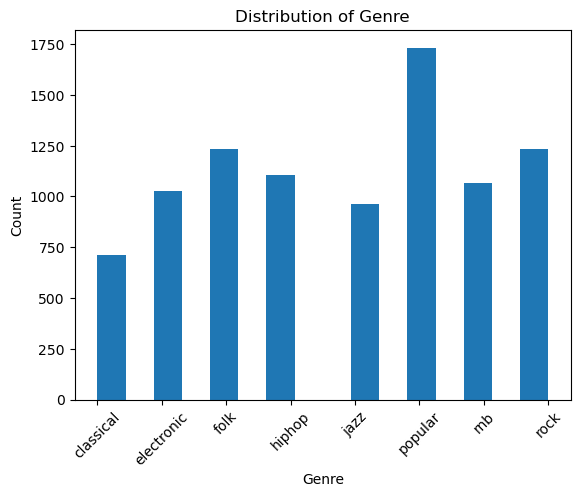

In [64]:
# Distribution of Genre
plt.figure() 
plt.hist(spotify['genre'], bins=16)
plt.title("Distribution of Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The genres look fairy distributed. Classical music has the least amount of tracks. Popular music has the most amount of songs. The others have around the same number of songs. 

If we see severe class imbalance after concatenating our two datasets together, then we can address that with weights or upsampling. So, for now let's leave all of the remaining genres in the dataset. 

**Let's look at the distribution of all the numeric columns:**

In [75]:
numeric_cols = spotify.select_dtypes(exclude='object')

In [78]:
len(numeric_cols.columns)

13

The only columns from our larger dataset not present below in this dataset are popularity and explicit. We can remove both from the larger dataset. 

In [76]:
numeric_cols.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,8800.00000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8.800000e+03,8800.000000
mean,0.58087,0.530413,5.196364,-9.740062,0.629318,0.078633,0.398077,0.197144,0.169077,0.435382,117.017465,2.367389e+05,3.912727
std,0.16774,0.266622,3.558430,6.547304,0.483015,0.083787,0.358748,0.343299,0.134705,0.236626,29.598199,8.226426e+04,0.385699
min,0.00000,0.000707,0.000000,-43.851000,0.000000,0.000000,0.000002,0.000000,0.008640,0.000000,0.000000,4.200000e+04,0.000000
25%,0.47100,0.327000,2.000000,-11.819500,0.000000,0.034600,0.055675,0.000000,0.095100,0.238750,94.035000,1.920352e+05,4.000000
50%,0.59150,0.564000,5.000000,-7.682000,1.000000,0.044600,0.279000,0.000079,0.117000,0.412000,116.112500,2.226755e+05,4.000000
75%,0.70300,0.746000,8.000000,-5.400000,1.000000,0.076225,0.765000,0.217000,0.192000,0.612000,135.006250,2.645208e+05,4.000000
max,0.97800,0.996000,11.000000,-0.150000,1.000000,0.856000,0.996000,0.990000,0.991000,0.982000,220.018000,1.561133e+06,5.000000


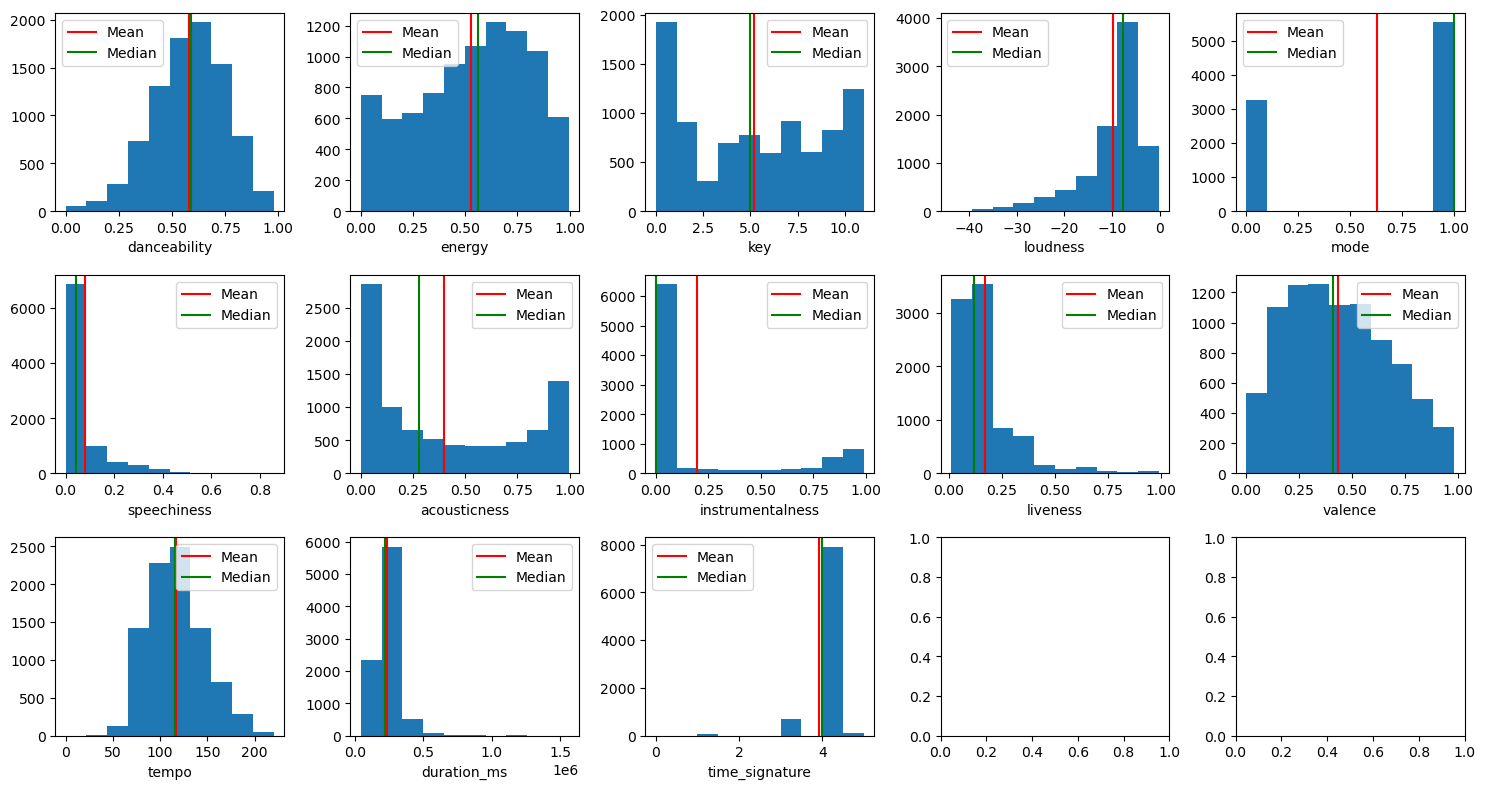

In [84]:
# Subplots of the distributions of our numeric columns 
plt.subplots(3,5, figsize=(15,8))

plot_num = 1 

# Looping through columns 
for col in numeric_cols.columns:
    feature = spotify[col]
    feature_mean = feature.mean()
    feature_median = feature.median()
    
    plt.subplot(3,5,plot_num)
    plt.hist(feature)
    plt.axvline(feature_mean, c='r', label='Mean')
    plt.axvline(feature_median, c='g', label='Median')
    plt.legend()
    plt.xlabel(col)
    
    plot_num +=1 
    
plt.tight_layout()

plt.show()

We can see a mix of right skewed, left skewed and normally distributed features. 

We can also see more clearly here that `key`, `mode`, and possibly `time_signature` are categorical variables that have been stored numerically. 

**Let's look at the distribution of our categorical columns:**

In [73]:
spotify.select_dtypes('object').describe()

,id,song_name,artist,genre
count,8800,8800,8800,8800
unique,8800,7943,3946,8
top,3U8Fx7zNTQrctytkj6Gqgd,Home,New York Jazz Lounge,popular
freq,1,7,100,1662


In [74]:
spotify.loc[spotify['artist'] == 'New York Jazz Lounge']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,song_name,artist,genre
5021,0.664,0.279,0.0,-12.924,1.0,0.0319,0.800,0.19700,0.0920,0.294,129.911,6MnNrEq5rIjkyg6cQKVORz,268493.0,4.0,All of Me,New York Jazz Lounge,jazz
5022,0.494,0.316,0.0,-12.723,1.0,0.0490,0.635,0.57700,0.1250,0.409,179.868,76WRlgdVXKDHOXWVZIzSMu,226307.0,4.0,Take The A-Train,New York Jazz Lounge,jazz
5023,0.406,0.234,5.0,-14.152,0.0,0.0342,0.882,0.44200,0.1130,0.300,169.887,160xVSijeYlKDVarUgTBWy,214200.0,4.0,All the Things You Are,New York Jazz Lounge,jazz
5024,0.757,0.219,0.0,-13.276,1.0,0.0370,0.813,0.31800,0.1000,0.245,113.933,1zxpbmwa9sq0RlfAF2C5Mg,302427.0,4.0,Satin Doll,New York Jazz Lounge,jazz
5025,0.533,0.268,5.0,-14.211,0.0,0.0311,0.844,0.23500,0.2020,0.345,63.145,0ymuB7r1bHBfVfXZ5XhAeu,253960.0,4.0,Fly Me to the Moon,New York Jazz Lounge,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.524,0.397,10.0,-11.092,1.0,0.0305,0.548,0.20700,0.2550,0.264,77.789,0qKbgeKBM4dbLQp2xsoDna,258108.0,4.0,Stella By Starlight,New York Jazz Lounge,jazz
5117,0.643,0.459,0.0,-11.623,1.0,0.0242,0.344,0.92100,0.3770,0.517,94.029,1eV7iCmfroj9GW3OzuWfbu,297807.0,4.0,Sweet Emma,New York Jazz Lounge,jazz
5118,0.457,0.454,0.0,-11.276,1.0,0.0305,0.564,0.00818,0.2720,0.377,155.848,4U41RZADoe7hgMD9K7TxUg,284368.0,4.0,On Green Dolphin Street,New York Jazz Lounge,jazz
5119,0.606,0.339,0.0,-10.713,1.0,0.0314,0.749,0.45000,0.0996,0.395,77.891,7rbNvJb2DD6qYu5LuZErJ5,316380.0,4.0,There Is No Greater Love,New York Jazz Lounge,jazz


We can see that the 100 occurences of "New York Jazz Lounge" is probably from a large cd collection of different artists. 

Now that we have a general idea about our target variable 'genre' and our independent variables, let's save this cleaned DataFrame to a new csv file so that we can concatenate with our larger dataset. 

In [86]:
spotify.to_csv('~/Desktop/CapstoneProject/data/smaller_spotify_cleaned.csv')